## Inflow driven model

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


import copy

from datetime import datetime

from scipy.optimize import curve_fit
import sklearn

In [16]:
file = "Data/CBP07671---Housing-supply---Historical-statistics-for-the-UK.xlsx"
table = "HB.E"
table_inflows = pd.read_excel(file, sheet_name=table,skiprows=1)


In [31]:
inflows=table_inflows['Total completions']
display(inflows)
years=table_inflows['Year']
display(np.array(years))

0      49250
1     120860
2     193590
3     162110
4     163340
       ...  
72    165490
73    177880
74    146620
75    174940
76    177810
Name: Total completions, Length: 77, dtype: int64

array([1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

### Polynomial regression

The polynomial our fit created is:
           5          4         3        2
0.0003814 x - 0.1598 x + 23.06 x - 1378 x + 3.012e+04 x + 7.947e+04


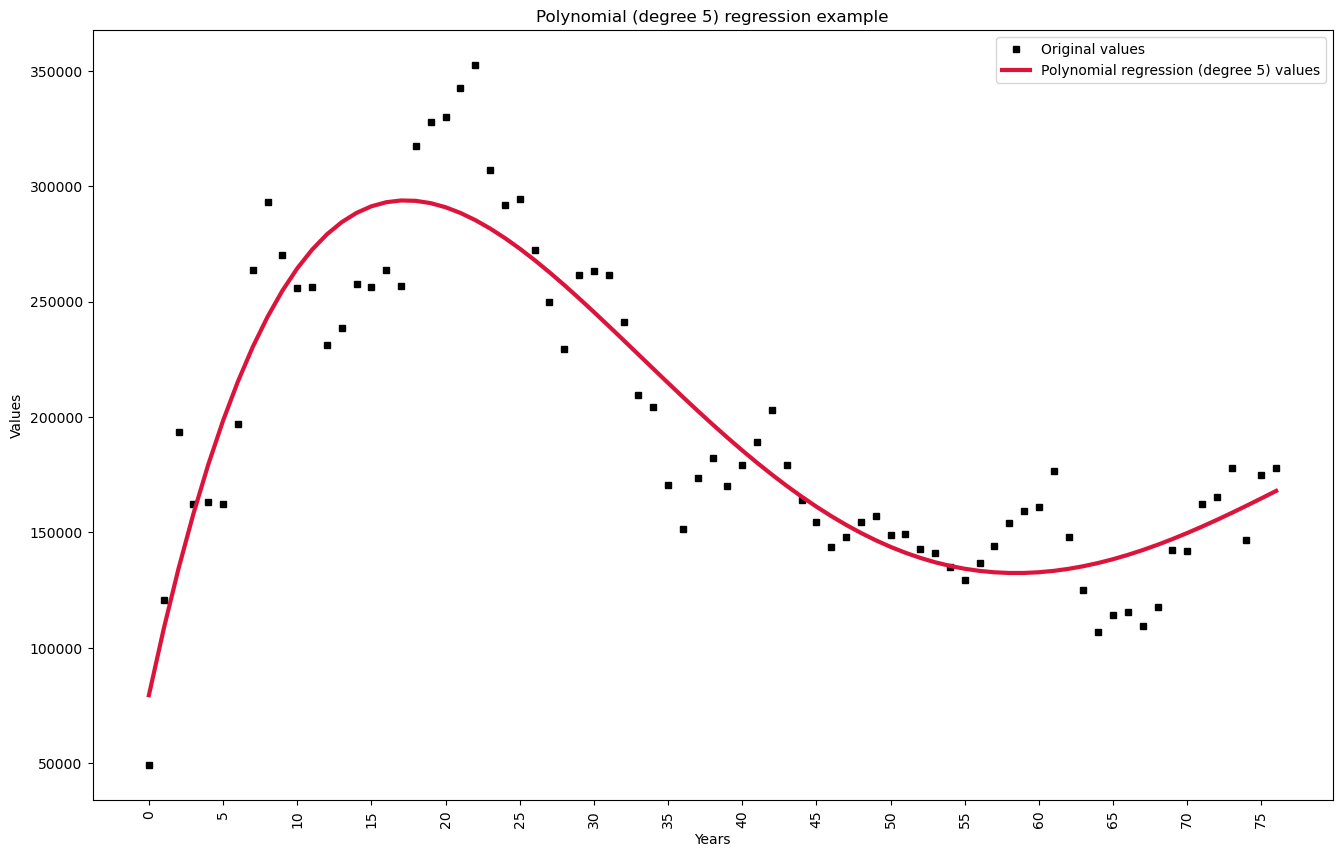

In [42]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))

# Prepare data for regression
reg_years_pop = list(range(len(inflows)))
reg_values_pop = np.array(inflows)
pred_inputs = years.to_list()

# Perform regression
degree = 5
coefficients = np.polyfit(reg_years_pop, reg_values_pop, degree)
polynomial = np.poly1d(coefficients)
print(f'The polynomial our fit created is:\n{polynomial}')

# Apply to extended values
pred_outputs_pol_pop = polynomial(reg_years_pop)

# Plot original values
plt.plot(reg_years_pop, reg_values_pop, 's', color='black', markersize=5, label='Original values')

# Plot polynomial regression values
plt.plot(reg_years_pop, pred_outputs_pol_pop, color='crimson', lw=3, label=f'Polynomial regression (degree {degree}) values')

# Set legend and ticks
plt.legend(loc='best')
plt.xticks(ticks=np.arange(0, len(reg_years_pop), 5), rotation=90)
plt.title(f'Polynomial (degree {degree}) regression example')
plt.xlabel('Years')
plt.ylabel('Values')

# Show the plot
plt.show()


### Polynomial regression with prediction on the past years

The polynomial our fit created is:
           5          4         3        2
0.0003814 x - 0.1598 x + 23.06 x - 1378 x + 3.012e+04 x + 7.947e+04


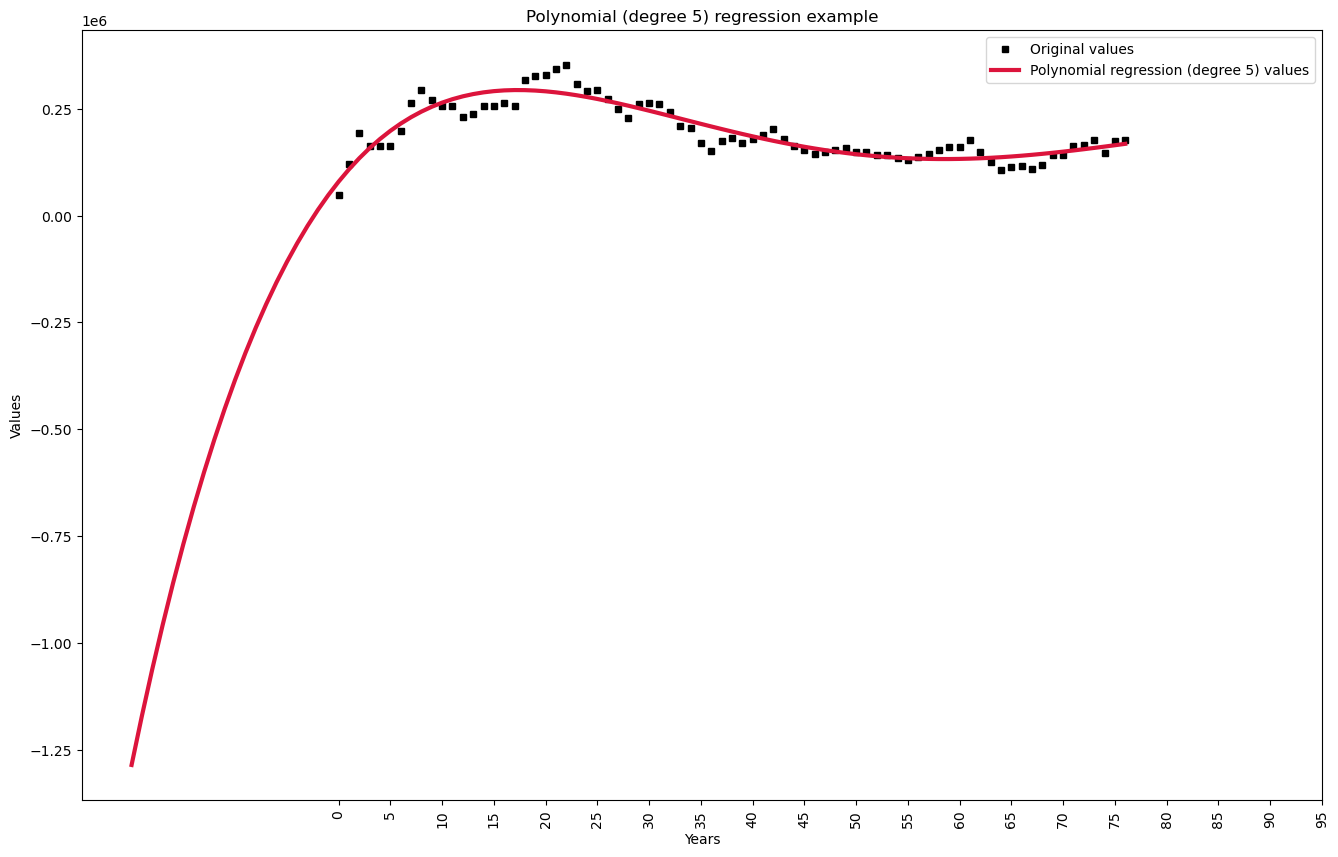

In [46]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))

# Prepare data for regression
reg_years_pop = list(range(len(inflows)))
reg_values_pop = np.array(inflows)
pred_inputs = years.to_list()

# Perform regression
degree = 5
coefficients = np.polyfit(reg_years_pop, reg_values_pop, degree)
polynomial = np.poly1d(coefficients)
print(f'The polynomial our fit created is:\n{polynomial}')

# Extend x-values 100 years before the start of the data
extended_years = list(range(reg_years_pop[0] - 20, reg_years_pop[-1] + 1))

# Apply to extended values
pred_outputs_pol_pop = polynomial(extended_years)

# Plot original values
plt.plot(reg_years_pop, reg_values_pop, 's', color='black', markersize=5, label='Original values')

# Plot polynomial regression values
plt.plot(extended_years, pred_outputs_pol_pop, color='crimson', lw=3, label=f'Polynomial regression (degree {degree}) values')

# Set legend and ticks
plt.legend(loc='best')
plt.xticks(ticks=np.arange(0, len(extended_years), 5), rotation=90)
plt.title(f'Polynomial (degree {degree}) regression example')
plt.xlabel('Years')
plt.ylabel('Values')

# Show the plot
plt.show()


### Logistic regression

In [48]:
#define logistic function and noise function
def logistic(x:np.ndarray,ti:float,tau:float,C0:float,C1:float) -> np.ndarray:
    """
    General logistic function.
    Arguments:
    - x: np.ndarray of observation points (time)
    - ti: inflection time
    - tau: transition time coefficient
    - C0: start value
    - C1: end value

    Returns:
    - np.ndarray with len(x) number of points
    """
    return (C1 - C0)/(1 + np.exp(-(x - ti) / tau)) + C0  

The optimal choice of parameters for the logistic function, given the sample data, is [3.38737889e+01 9.59674581e-01 2.49876987e+05 1.52133652e+05] (ti, tau, C0, C1).


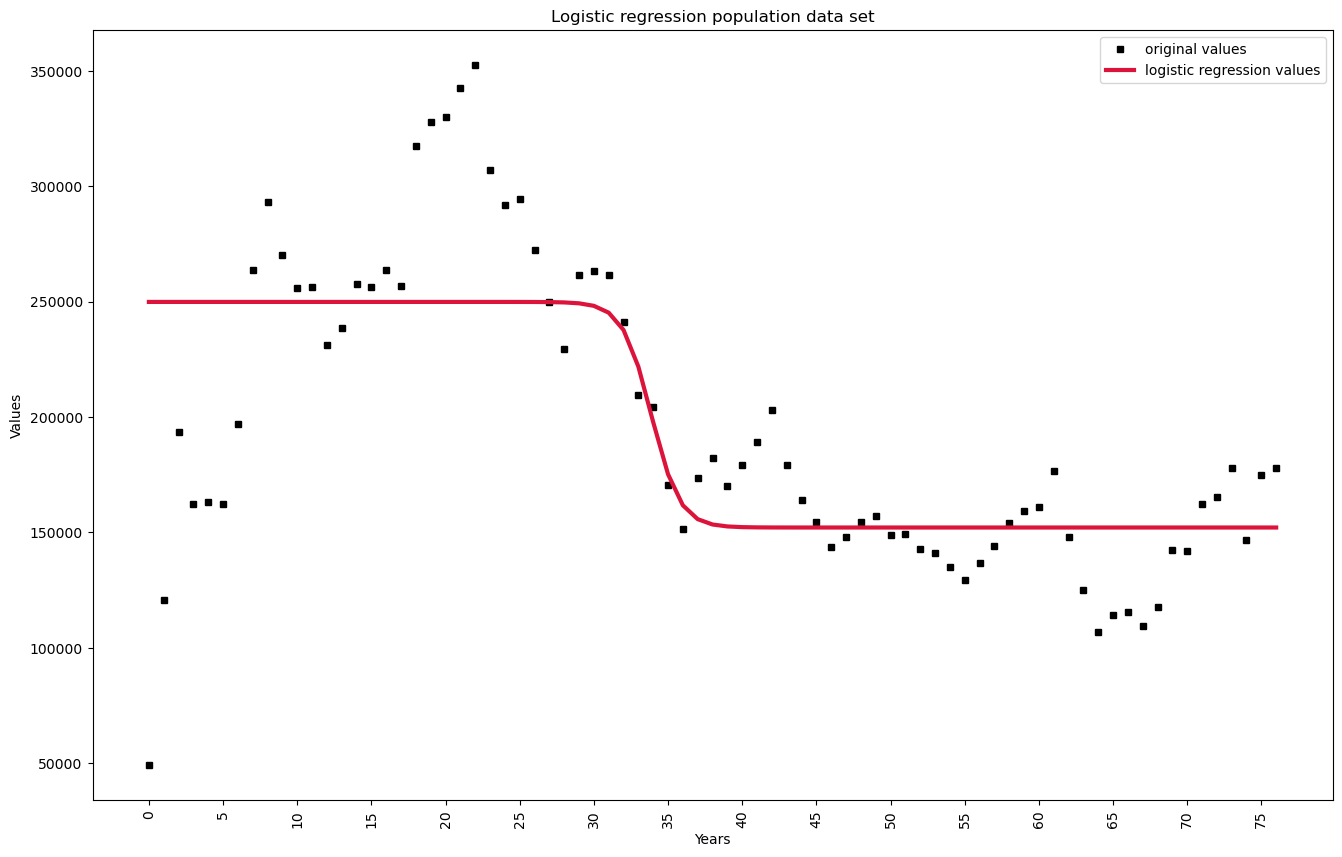

In [49]:
fig=plt.figure(figsize = (16,10))

inputs = reg_years_pop
outputs = reg_values_pop
pred_inputs = reg_years_pop

# it might be necessary to adjust the bounds argument, 
# determining the extreme acceptable value for the parameters of the logistic function.
# Bounds are set as ([low_ti, low_tau, low_Co, low_C1],[high_ti,high_tau, high_Co, high_C1 ])
popt, pcov = curve_fit(logistic, inputs, outputs, bounds = ([min(inputs), 0, 0, 0], [max(inputs), 2*10**6, 2*10**6, 2*10**6]))
pred_outputs_log_pop = logistic(pred_inputs, *popt)

print(f'The optimal choice of parameters for the logistic function, given the sample data, is {popt} (ti, tau, C0, C1).')


plt.plot(reg_years_pop, reg_values_pop, 's', color = 'black', markersize = 5, label = f'original values')
plt.plot(pred_inputs, pred_outputs_log_pop, color = 'crimson', lw = 3, label = 'logistic regression values')
plt.legend(loc = 'best')
#plt.xticks(ticks = np.rint(oj_years[:limit_pred:int(len(reg_years_pop)/10)]))
plt.xticks(ticks=np.arange(0,len(reg_years_pop),5),rotation=90)
plt.xlabel('Years')
plt.ylabel('Values')


#add plot and labels here
plt.title('Logistic regression population data set')
plt.show()